# In Class Notebook, Week 16

You can always click this URL https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week16/inClass_week16.ipynb 

Or paste the URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jnaiman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jnaiman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/jnaiman/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
import string
import itertools
from wordcloud import WordCloud, ImageColorGenerator

In [4]:
import matplotlib.pyplot as plt

In [5]:
filename = '/Users/jnaiman/Downloads/othello.txt'

In [6]:
with open(filename, 'r') as f:
    text = f.read()

In [7]:
text[:1000]

"\nACT I\nSCENE I. Venice. A street.\nEnter RODERIGO and IAGO\nRODERIGO\nTush! never tell me; I take it much unkindly\nThat thou, Iago, who hast had my purse\nAs if the strings were thine, shouldst know of this.\nIAGO\n'Sblood, but you will not hear me:\nIf ever I did dream of such a matter, Abhor me.\nRODERIGO\nThou told'st me thou didst hold him in thy hate.\nIAGO\nDespise me, if I do not. Three great ones of the city,\nIn personal suit to make me his lieutenant,\nOff-capp'd to him: and, by the faith of man,\nI know my price, I am worth no worse a place:\nBut he; as loving his own pride and purposes,\nEvades them, with a bombast circumstance\nHorribly stuff'd with epithets of war;\nAnd, in conclusion,\nNonsuits my mediators; for, 'Certes,' says he,\n'I have already chose my officer.'\nAnd what was he?\nForsooth, a great arithmetician,\nOne Michael Cassio, a Florentine,\nA fellow almost damn'd in a fair wife;\nThat never set a squadron in the field,\nNor the division of a battle knows

In [8]:
myWords = text.split()

In [10]:
myWords[:10]

['ACT',
 'I',
 'SCENE',
 'I.',
 'Venice.',
 'A',
 'street.',
 'Enter',
 'RODERIGO',
 'and']

In [11]:
wordsDict = {}
for word in myWords:
    if word in wordsDict: # already there
        wordsDict[word] += 1 # add 1 to the count of this word
    else:
        wordsDict[word] = 1 # start the count for a new word

In [13]:
#wordsDict

In [14]:
import operator
wordsDict = sorted(wordsDict.items(), key=operator.itemgetter(1))
# sort my dictionary, key=how to sort? --> .items gives key,value pairs, so 1 sorts by value

In [16]:
wordsDict[::-1]

[('I', 803),
 ('the', 669),
 ('and', 584),
 ('to', 455),
 ('of', 417),
 ('a', 389),
 ('my', 368),
 ('you', 300),
 ('in', 288),
 ('IAGO', 288),
 ('OTHELLO', 287),
 ('not', 260),
 ('is', 247),
 ('that', 236),
 ('be', 195),
 ('your', 194),
 ('with', 194),
 ('it', 193),
 ('have', 187),
 ('And', 185),
 ('me', 181),
 ('DESDEMONA', 175),
 ('do', 170),
 ('he', 159),
 ('for', 157),
 ('his', 156),
 ('this', 154),
 ('her', 149),
 ('but', 125),
 ('CASSIO', 124),
 ('will', 124),
 ('EMILIA', 121),
 ('To', 117),
 ('thou', 115),
 ('she', 113),
 ('as', 110),
 ('him', 109),
 ('That', 101),
 ('so', 89),
 ('are', 88),
 ('The', 87),
 ('on', 87),
 ('shall', 83),
 ('by', 81),
 ('am', 80),
 ('What', 76),
 ('O', 74),
 ('thy', 74),
 ('But', 73),
 ('would', 72),
 ('RODERIGO', 72),
 ('if', 70),
 ('all', 68),
 ('If', 67),
 ('from', 66),
 ('what', 65),
 ('was', 64),
 ('no', 63),
 ('For', 62),
 ('O,', 62),
 ('such', 61),
 ('at', 60),
 ('My', 59),
 ('some', 59),
 ('or', 57),
 ('good', 57),
 ('you,', 55),
 ("I'll", 55

In [17]:
wordsDict = dict(wordsDict[::-1])

In [18]:
wordsDict

{'I': 803,
 'the': 669,
 'and': 584,
 'to': 455,
 'of': 417,
 'a': 389,
 'my': 368,
 'you': 300,
 'in': 288,
 'IAGO': 288,
 'OTHELLO': 287,
 'not': 260,
 'is': 247,
 'that': 236,
 'be': 195,
 'your': 194,
 'with': 194,
 'it': 193,
 'have': 187,
 'And': 185,
 'me': 181,
 'DESDEMONA': 175,
 'do': 170,
 'he': 159,
 'for': 157,
 'his': 156,
 'this': 154,
 'her': 149,
 'but': 125,
 'CASSIO': 124,
 'will': 124,
 'EMILIA': 121,
 'To': 117,
 'thou': 115,
 'she': 113,
 'as': 110,
 'him': 109,
 'That': 101,
 'so': 89,
 'are': 88,
 'The': 87,
 'on': 87,
 'shall': 83,
 'by': 81,
 'am': 80,
 'What': 76,
 'O': 74,
 'thy': 74,
 'But': 73,
 'would': 72,
 'RODERIGO': 72,
 'if': 70,
 'all': 68,
 'If': 67,
 'from': 66,
 'what': 65,
 'was': 64,
 'no': 63,
 'For': 62,
 'O,': 62,
 'such': 61,
 'at': 60,
 'My': 59,
 'some': 59,
 'or': 57,
 'good': 57,
 'you,': 55,
 "I'll": 55,
 'they': 55,
 'must': 55,
 'As': 54,
 'hath': 53,
 'had': 53,
 'love': 52,
 'A': 52,
 'more': 51,
 'It': 51,
 'did': 51,
 'think': 49

In [19]:
n = 50 # number of bars in my plot -- for 50 most frequent, good thing we sorted!

In [20]:
wordsPlot = {k:wordsDict[k] for k in list(wordsDict)[:n]}

In [22]:
#wordsPlot

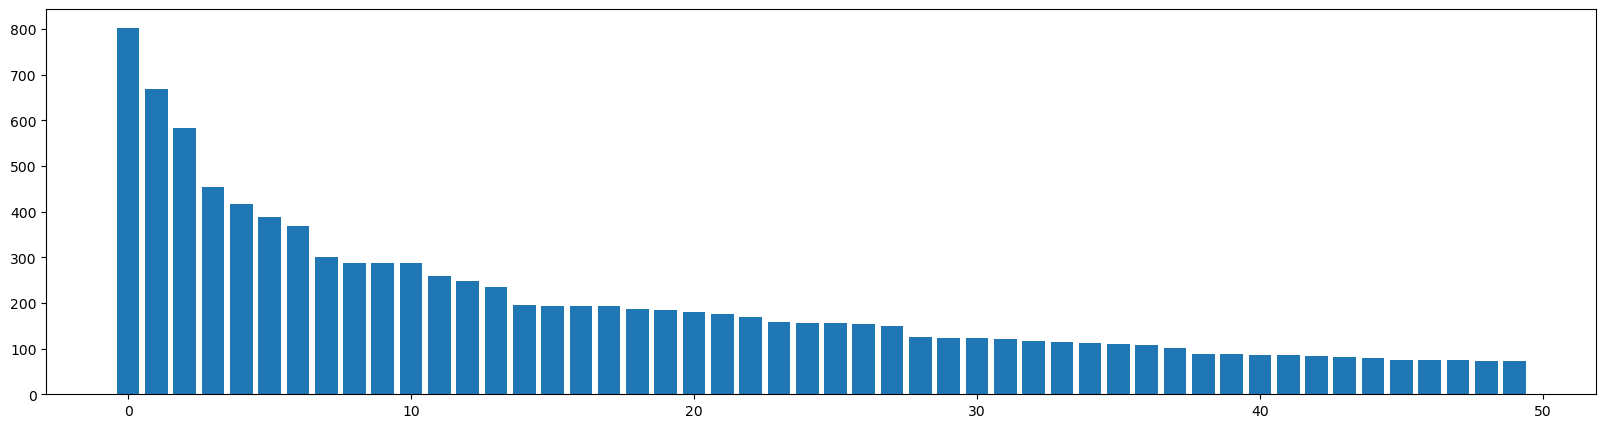

In [23]:
fig, ax = plt.subplots(figsize=(20,5))

ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align = 'center')

plt.show()